In [5]:
import pandas as pd
#credits:https://medium.com/@luckylwk/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b
df = pd.read_excel(r"C:\ML Hackathon\pandas_output2.xlsx")
df = df.drop(columns = ["State_x","County_x"])
df_x = pd.read_excel(r"C:\ML Hackathon\Data_Download_with_defined_target.xls", sheet_name = "STORES")
df_x = df_x[["FIPS","TARGET"]]
df = pd.merge(df,df_x,on="FIPS")
df = df.drop(['Grocery stores, 2014'], axis = 1)

In [6]:
df['label'] = df['TARGET']

In [9]:
import numpy as np
import matplotlib.pyplot as plt
rndperm = np.random.permutation(df.shape[0])

In [12]:
#PCA doesnt work with missing values:

df[['Population, low access to store, 2010','Population, low access to store, 2015']]
df[['Population, low access to store, 2015']] = df.apply(
    lambda row: row['Population, low access to store, 2010'] if np.isnan(row['Population, low access to store, 2015']) else row['Population, low access to store, 2015'],
    axis = 1
)
#filled 'Population, low access to store, 2015' with 'Population, low access to store, 2010' values
#wherever blank, assuming no change.

df[['Low income & low access to store, 2015']] = df.apply(
    lambda row: row['Low income & low access to store, 2010'] if np.isnan(row['Low income & low access to store, 2015']) else row['Low income & low access to store, 2010'],
    axis = 1
)
#filled 'Low income & low access to store, 2015' with 'Low income & low access to store, 2010' values
#wherever blank, assuming no change.

df[['Households, no car & low access to store, 2015']] = df.apply(
    lambda row: row['Households, no car & low access to store, 2010'] if np.isnan(row['Households, no car & low access to store, 2015']) else row['Households, no car & low access to store, 2010'],
    axis = 1
)
#filled 'Households, no car & low access to store, 2015' with 'Households, no car & low access to store, 2010' values
#wherever blank, assuming no change.

df[['Children, low access to store, 2015']] = df.apply(
    lambda row: row['Children, low access to store, 2010'] if np.isnan(row['Children, low access to store, 2015']) else row['Children, low access to store, 2010'],
    axis = 1
)
#filled 'Children, low access to store, 2015' with 'Children, low access to store, 2010' values
#wherever blank, assuming no change.
    
df[['SNAP-authorized stores, 2016']] = df.apply(
    lambda row: row['SNAP-authorized stores, 2012'] if np.isnan(row['SNAP-authorized stores, 2016']) else row['SNAP-authorized stores, 2012'],
    axis = 1
)
#filled 'SNAP-authorized stores, 2016' with 'SNAP-authorized stores, 2012' values
#wherever blank, assuming no change.

df[['SNAP-authorized stores/1,000 pop, 2016']] = df.apply(
    lambda row: row['SNAP-authorized stores/1,000 pop, 2016']/row['Population Estimate, 2016'] if np.isnan(row['SNAP-authorized stores/1,000 pop, 2016']) else row['SNAP-authorized stores/1,000 pop, 2016'],
    axis = 1
)
df['Population-loss counties, 2010'].fillna((df['Population-loss counties, 2010'].mode()), inplace=True)
df['Farm to school program, 2009'].fillna((df['Farm to school program, 2009'].mode()), inplace=True)
df['Farm to school program, 2013'].fillna((df['Farm to school program, 2013'].mode()), inplace=True)

#fillinf rest in as medians
df = df.fillna(df.median())

In [21]:
df

,FIPS,"Population, low access to store, 2010","Population, low access to store, 2015","Low income & low access to store, 2010","Low income & low access to store, 2015","Households, no car & low access to store, 2010","Households, no car & low access to store, 2015","SNAP households, low access to store, 2015","Children, low access to store, 2010","Children, low access to store, 2015",...,"Population Estimate, 2012","Population Estimate, 2013","Population Estimate, 2014","Population Estimate, 2015","Population Estimate, 2016",TARGET,label,pca-one,pca-two,pca-three
0,39127,3713.640840,1410.531617,1898.685754,1898.685754,790.543946,790.543946,168.620514,1094.142002,1094.142002,...,35991,35977,35886,35952,35927,0,0,-1.926065e+05,-1.590803e+05,29693.628751
1,12035,33564.747365,33041.245469,9805.739747,9805.739747,861.286373,861.286373,1255.111943,6983.983143,6983.983143,...,98605,100013,102471,105188,108310,0,0,1.830581e+04,8.521157e+04,-490570.996338
2,16023,605.164533,618.473210,267.297015,267.297015,6.680208,6.680208,28.709604,199.206240,199.206240,...,2722,2626,2609,2501,2501,0,0,-2.846759e+05,-2.041394e+05,45162.113509
3,12081,74391.881668,70204.895488,18524.575189,18524.575189,1306.101746,1306.101746,2335.402236,12245.034104,12245.034104,...,334096,342246,351713,363110,375888,1,1,6.291147e+05,-2.488226e+05,47319.965419
4,22067,6896.431864,6826.518316,3895.543014,3895.543014,687.008404,687.008404,628.112358,1723.974298,1723.974298,...,27454,27012,26732,26428,26071,1,1,-2.127852e+05,-1.515883e+05,30614.282557
5,5031,24129.965162,15955.202306,9933.312583,9933.312583,1008.814323,1008.814323,1161.261934,6106.792296,6106.792296,...,99948,101654,102621,104362,105835,0,0,-1.880262e+04,-1.919262e+05,23484.804656
6,1053,5188.706191,5058.775403,2903.320779,2903.320779,557.956012,557.956012,557.141717,1285.770057,1285.770057,...,38063,37877,37878,37827,37728,1,1,-1.841672e+05,-1.537856e+05,29457.941042
7,20093,350.213727,3977.000000,106.814050,106.814050,42.103988,42.103988,74.123788,100.306173,100.306173,...,3983,3921,3944,3948,3917,0,0,-2.361249e+05,1.692194e+05,-504861.970869
8,51013,5136.184060,4485.108839,174.962518,174.962518,53.487253,53.487253,3.346864,1272.799501,1272.799501,...,221625,225187,225702,227897,230050,0,0,2.919603e+05,-2.566447e+05,11485.587513
9,42007,67604.925063,62536.298461,21133.657431,21133.657431,3701.121905,3701.121905,4284.751063,13982.336276,13982.336276,...,170250,170045,169392,168908,167429,0,0,1.799513e+05,-7.629128e+04,91642.980639


In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
pca_result = pca.fit_transform(df.iloc[:,0:-1].values)

df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1]
df['pca-three'] = pca_result[:,2]

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))


Explained variation per principal component: [0.52641265 0.34756938 0.08516289]


C:\anaconda3\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
C:\anaconda3\lib\site-packages\ggplot\stats\smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
C:\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
C:\anaconda3\lib\site-packages\PIL\Image.py:77: RuntimeWarning: The _imaging extension was built for another version of Pillow or PIL: Core Version: 4.2.1Pillow Version:  5.0.0
  warnings.warn(str(v), RuntimeWarning)


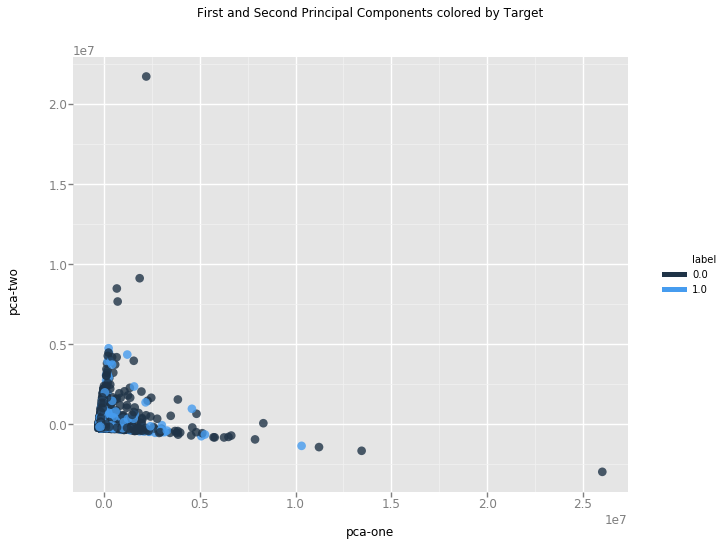

<ggplot: (145017503976)>

In [26]:
#the first and secnd principal components account for about 86% variance in the data
import ggplot
from ggplot import *

chart = ggplot( df.loc[rndperm[:3000],:], aes(x='pca-one', y ='pca-two', color='label'))\
        + geom_point(size=75, alpha=0.8)\
        + ggtitle("First and Second Principal Components colored by Target")
chart    

In [24]:
import time
#recommended to use other dimensionality reduction techniques on dataset
#as t-SNE runs in quadratic time
#but our dataset is quite small, so we should be fine directly running t-SNE
from sklearn.manifold import TSNE

n_sne = 3143

time_start = time.time()
tsne = TSNE(n_components = 2, verbose=1, perplexity=40,n_iter=300)
tsne_results = tsne.fit_transform(df.iloc[:,0:-1].values)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time() - time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 3143 samples in 0.027s...
[t-SNE] Computed neighbors for 3143 samples in 1.606s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3143
[t-SNE] Computed conditional probabilities for sample 2000 / 3143
[t-SNE] Computed conditional probabilities for sample 3000 / 3143
[t-SNE] Computed conditional probabilities for sample 3143 / 3143
[t-SNE] Mean sigma: 31237.919521
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.893730
[t-SNE] Error after 300 iterations: 1.461128
t-SNE done! Time elapsed: 32.91954469680786 seconds


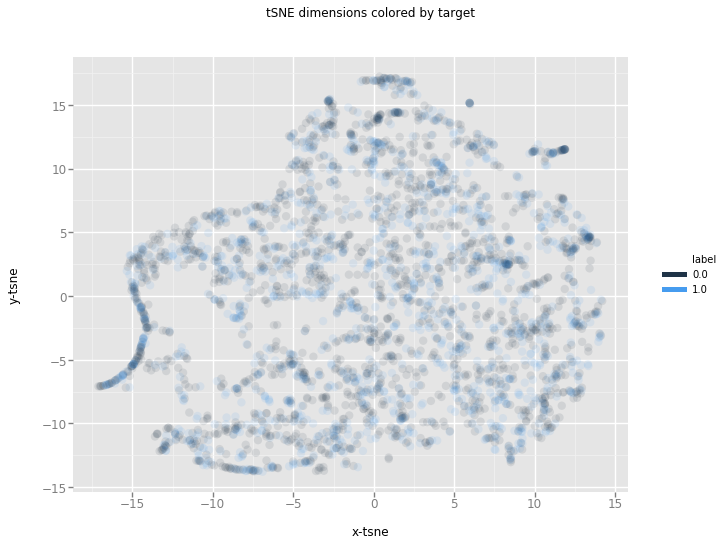

<ggplot: (145017470037)>

In [28]:
df_tsne = df.loc[rndperm[:n_sne],:].copy()
df_tsne['x-tsne'] = tsne_results[:,0]
df_tsne['y-tsne'] = tsne_results[:,1]

chart = ggplot(df_tsne, aes(x='x-tsne', y='y-tsne', color='label'))\
        +geom_point(size=70,alpha=0.1)\
        +ggtitle("tSNE dimensions colored by target")
chart